### Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 45.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shrutimechlearn/churn-modelling/versions/1


In [ ]:
import pandas as pd
df = pd.read_csv(path + "/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data cleaning

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## EDA

<Axes: xlabel='Geography', ylabel='Exited'>

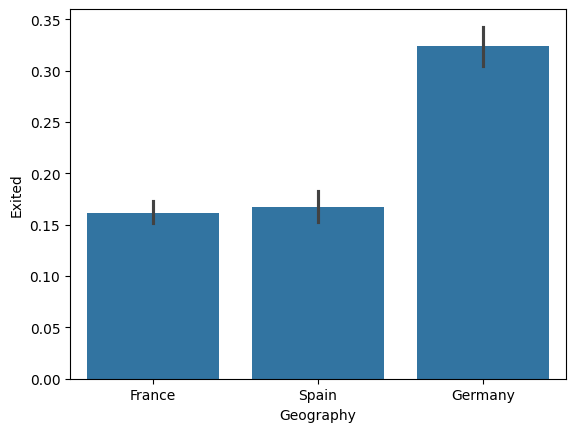

In [ ]:
sns.barplot(data=df, x='Geography', y='Exited')

In [ ]:
print(df['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


<Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>

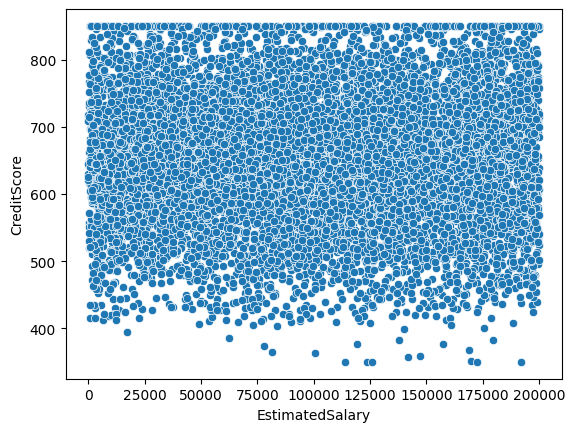

In [ ]:
sns.scatterplot(data=df, x='EstimatedSalary', y='CreditScore')

### Correlation

In [ ]:
correlation = df.corr(numeric_only= True, method='pearson')
print(correlation)

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

<Figure size 1000x1200 with 0 Axes>

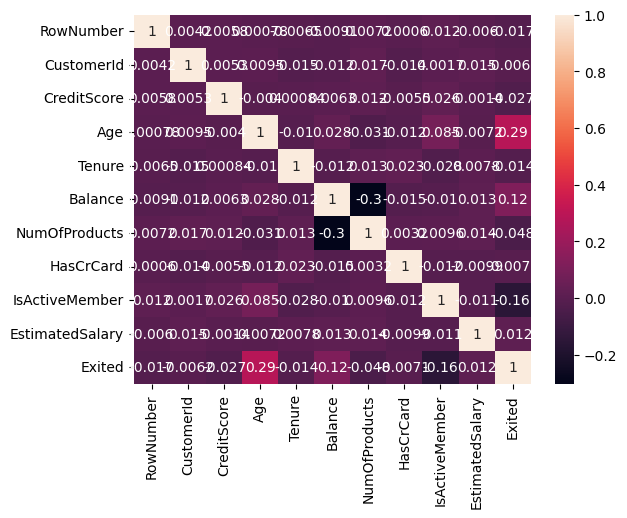

<Figure size 1000x1200 with 0 Axes>

In [ ]:
sns.heatmap(correlation, annot=True)
plt.figure(figsize=(10,12))

### Encoding

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns= ['Geography'], drop_first =True)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### Features for training and testing

In [ ]:
features = [ 'CreditScore', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember',
             'EstimatedSalary', 'Gender',
            'Geography_Germany', 'Geography_Spain']
X = df[features]
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Feature Scaling

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


### Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy")
print(accuracy)

Confusion Matrix:
[[1548   59]
 [ 202  191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy
0.8695


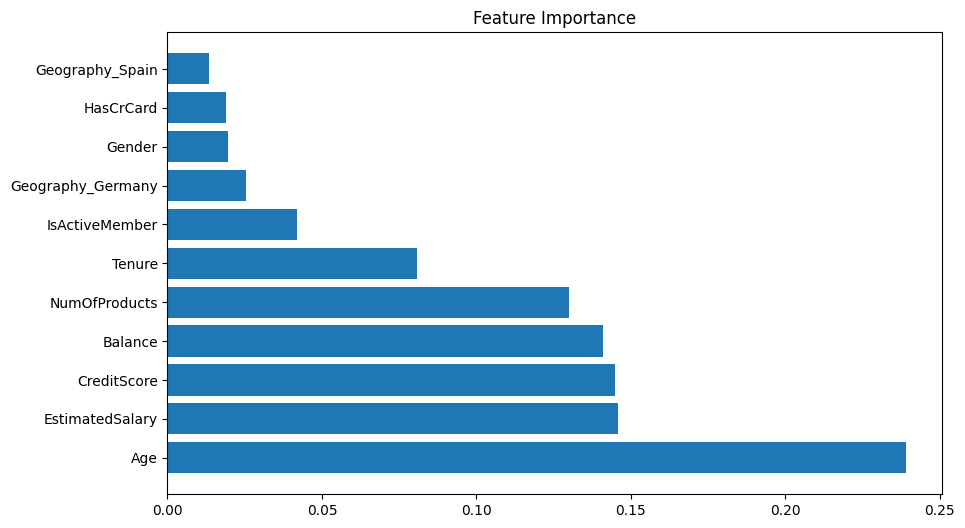

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("\nClassification Report:")
print(class_report_log_reg)
print("\nAccuracy")
print(accuracy_log_reg)

Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Accuracy
0.811


### Support vector meachine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model= SVC(kernel = 'linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
conf_matrix_svm_model = confusion_matrix(y_test, y_pred_svm)
class_report_svm_model = classification_report(y_test, y_pred_svm)
accuracy_svm_model = accuracy_score(y_test,y_pred_svm)

print("Confusion Matrix:")
print(conf_matrix_svm_model)
print("\nClassification Report:")
print(class_report_svm_model)
print("\nAccuracy")
print(accuracy_svm_model)

Confusion Matrix:
[[1607    0]
 [ 393    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Accuracy
0.8035


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test,y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)
print("\nAccuracy")
print(accuracy_knn)

Confusion Matrix:
[[1514   93]
 [ 247  146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000


Accuracy
0.83


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gbm = gbm_model.predict(X_test)

In [ ]:
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test,y_pred_gbm )
accuracy_gbm = accuracy_score(y_test, y_pred_gbm )

print("Confusion Matrix:")
print(conf_matrix_gbm)
print("\nClassification Report:")
print(class_report_gbm)
print("\nAccuracy")
print(accuracy_gbm)

Confusion Matrix:
[[1543   64]
 [ 201  192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy
0.8675
